In [246]:
import nltk
nltk.download('gutenberg')
nltk.download('brown')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('treebank')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.corpus import stopwords,treebank
from nltk.stem import *
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import gutenberg
import pandas as pd
import re

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\atind\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_d

In [247]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [248]:
gutenberg.raw('shakespeare-caesar.txt')

"[The Tragedie of Julius Caesar by William Shakespeare 1599]\n\n\nActus Primus. Scoena Prima.\n\nEnter Flauius, Murellus, and certaine Commoners ouer the Stage.\n\n  Flauius. Hence: home you idle Creatures, get you home:\nIs this a Holiday? What, know you not\n(Being Mechanicall) you ought not walke\nVpon a labouring day, without the signe\nOf your Profession? Speake, what Trade art thou?\n  Car. Why Sir, a Carpenter\n\n   Mur. Where is thy Leather Apron, and thy Rule?\nWhat dost thou with thy best Apparrell on?\nYou sir, what Trade are you?\n  Cobl. Truely Sir, in respect of a fine Workman, I am\nbut as you would say, a Cobler\n\n   Mur. But what Trade art thou? Answer me directly\n\n   Cob. A Trade Sir, that I hope I may vse, with a safe\nConscience, which is indeed Sir, a Mender of bad soules\n\n   Fla. What Trade thou knaue? Thou naughty knaue,\nwhat Trade?\n  Cobl. Nay I beseech you Sir, be not out with me: yet\nif you be out Sir, I can mend you\n\n   Mur. What mean'st thou by tha

In [249]:
len(gutenberg.raw('shakespeare-caesar.txt'))

112310

In [250]:
gutenberg_data = {}
books = ['shakespeare-caesar.txt', 'blake-poems.txt']
for book in books:
    words = gutenberg.words(book)
    punctuation = [',', '.', "\'", '-', "'s", '"',
                   "``", "''", "!", "[", "]", '.--', ":", ";"]
    clean_words = [i.lower() for i in words if i not in punctuation]
    num_raw = len(gutenberg.raw(book))
    num_sentences = len(gutenberg.sents(book))
    num_words = len(clean_words)
    vocab = list(set(clean_words))
    num_vocab = len(vocab)
    avg_char_per_word = round((num_raw / num_words))
    ttr = (num_vocab/num_words)*100
    gutenberg_data[book] = {
        "characters": num_raw,
        "sentences": num_sentences,
        "words": num_words,
        "vocab": num_vocab,
        "ttr": ttr,
        "Avg Char per Word": avg_char_per_word
    }

In [251]:
gutenberg_data = pd.DataFrame(gutenberg_data)
gutenberg_data

,shakespeare-caesar.txt,blake-poems.txt
characters,112310.00000,38153.000000
sentences,2163.00000,438.000000
words,21241.00000,7064.000000
vocab,3023.00000,1525.000000
ttr,14.23191,21.588335
Avg Char per Word,5.00000,5.000000


To obtain most frequent words distribution, average chapter length, most frequent phrases (bi, tri and quadgrams), names of characters, places, and events for any two books/novel. 

In [252]:
gutenberg_data.iloc[2][books[0]]

21241.0

In [253]:
gutenberg.raw(books[1])

'[Poems by William Blake 1789]\n\n \nSONGS OF INNOCENCE AND OF EXPERIENCE\nand THE BOOK of THEL\n\n\n SONGS OF INNOCENCE\n \n \n INTRODUCTION\n \n Piping down the valleys wild,\n   Piping songs of pleasant glee,\n On a cloud I saw a child,\n   And he laughing said to me:\n \n "Pipe a song about a Lamb!"\n   So I piped with merry cheer.\n "Piper, pipe that song again;"\n   So I piped: he wept to hear.\n \n "Drop thy pipe, thy happy pipe;\n   Sing thy songs of happy cheer:!"\n So I sang the same again,\n   While he wept with joy to hear.\n \n "Piper, sit thee down and write\n   In a book, that all may read."\n So he vanish\'d from my sight;\n   And I pluck\'d a hollow reed,\n \n And I made a rural pen,\n   And I stain\'d the water clear,\n And I wrote my happy songs\n   Every child may joy to hear.\n \n \n THE SHEPHERD\n \n How sweet is the Shepherd\'s sweet lot!\n From the morn to the evening he stays;\n He shall follow his sheep all the day,\n And his tongue shall be filled with praise

In [254]:
# chapters = [18, ] # found on official website of gutenberg docs

# words_per_chapter = gutenberg_data.iloc[2][books[i]] / chapters[i] 
# print(f"The words per chapters (average chapter length) are {round(float(words_per_chapter),2)}")

### Bigrams, Trigrams, Quadgrams

In [255]:
from nltk.collocations import *

In [256]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

In [257]:
def bigrams(book_in_gutenberg, count=10):
    finder = BigramCollocationFinder.from_words(gutenberg.words(book_in_gutenberg))
    return finder.nbest(bigram_measures.pmi, count)
    
def trigrams(book_in_gutenberg, count=10):
    finder = TrigramCollocationFinder.from_words(gutenberg.words(book_in_gutenberg))
    return finder.nbest(trigram_measures.pmi, count)
    
def quadgrams(book_in_gutenberg, count=10):
    finder = QuadgramCollocationFinder.from_words(gutenberg.words(book_in_gutenberg))
    return finder.nbest(fourgram_measures.pmi, count)

In [258]:
def plot_ngrams(n_grams):
    plt.bar(n_grams_len_list, height= n_grams_len_list)
    plt.show()

#### Book  1 - Julius Ceaser

In [259]:
bigrams(books[0])

[('Attendants', 'absent'),
 ('Barren', 'touched'),
 ('Captiue', 'bonds'),
 ('Cauerne', 'darke'),
 ('Chimney', 'tops'),
 ('Coffers', 'fill'),
 ('Comets', 'seen'),
 ('Cynicke', 'rime'),
 ('Darts', 'inuenomed'),
 ('Depart', 'vntouch')]

In [260]:
trigrams(books[0])

[('Et', 'Tu', 'Brute'),
 ('OF', 'IVLIVS', 'CaeSAR'),
 ('THE', 'TRAGEDIE', 'OF'),
 ('TRAGEDIE', 'OF', 'IVLIVS'),
 ('William', 'Shakespeare', '1599'),
 ('deceitfull', 'Iades', 'Sinke'),
 ('lowly', 'courtesies', 'Might'),
 ('twentie', 'Torches', 'ioyn'),
 ('yon', 'grey', 'Lines'),
 ('Fierce', 'fiery', 'Warriours')]

In [261]:
quadgrams(books[0])

[('THE', 'TRAGEDIE', 'OF', 'IVLIVS'),
 ('TRAGEDIE', 'OF', 'IVLIVS', 'CaeSAR'),
 ('William', 'Shakespeare', '1599', ']'),
 ('poor', 'poor', 'dum', 'mouths'),
 ('Like', 'twentie', 'Torches', 'ioyn'),
 ('open', 'Perils', 'surest', 'answered'),
 ('Fierce', 'fiery', 'Warriours', 'fight'),
 ('misgiuing', 'still', 'Falles', 'shrewdly'),
 ('watchfull', 'Cares', 'doe', 'interpose'),
 ('Cautelous', 'Old', 'feeble', 'Carrions')]

#### Book 2 - William Blake

In [262]:
bigrams(books[1])

[('\',"', 'Thus'),
 ('(', 'Grave'),
 ('1789', ']'),
 ('AH', 'SUNFLOWER'),
 ('ANCIENT', 'BARD'),
 ('Dame', 'Lurch'),
 ('ECHOING', 'GREEN'),
 ('Eternal', 'bane'),
 ('Eyelids', 'stord'),
 ('HUMAN', 'ABSTRACT')]

In [263]:
trigrams(books[1])

[('Had', 'just', 'removed'),
 ('Nostril', 'wide', 'inhaling'),
 ('TO', 'TERZAH', 'Whate'),
 ('blushed', 'rosy', 'red'),
 ('butterfly', 'scarce', 'perches'),
 ('cruelty', 'didst', 'mould'),
 ('deadly', 'terrors', 'clasp'),
 ('gilded', 'butterfly', 'scarce'),
 ('terrific', 'porter', 'lifted'),
 ('wailing', 'wight', 'Calls')]

In [264]:
quadgrams(books[1])

[('gilded', 'butterfly', 'scarce', 'perches'),
 ('Nostril', 'wide', 'inhaling', 'terror'),
 ('gates', 'terrific', 'porter', 'lifted'),
 ('MY', 'PRETTY', 'ROSE', 'TREE'),
 ('Every', 'blackening', 'church', 'appals'),
 ('eternal', 'gates', 'terrific', 'porter'),
 ('With', 'cruelty', 'didst', 'mould'),
 ('sea', 'Sought', 'through', 'nature'),
 ('William', 'Blake', '1789', ']'),
 ('dimpling', 'stream', 'runs', 'laughing')]

### Frequncy count and Plotting values

In [265]:
def frequency_count(preped_text,word_freq={}):
#     word_freq = dict()
    for i  in preped_text:
        if i in word_freq.keys():
            word_freq[i] += 1
        else:
            word_freq[i] = 0
    word_freq = dict(sorted(word_freq.items(), key=lambda item: (item[1],item[0]),reverse=True))
    return word_freq

In [266]:
def preprocessing(book):
    text = gutenberg.raw(book)
    lower_text = text.lower()
    tokinized_words = nltk.word_tokenize(lower_text)
    punctuation = [',', '.', "\'", '-', "'s", '"', "``", "''","[","]","?",":"]
    clean_words = [i for i in tokinized_words if i not in punctuation]
    return clean_words

In [267]:
def freq_counter(clean_words):
    freq_count = frequency_count(clean_words)
    return freq_count


def most_freq_words(clean_words):
    freq_count = freq_counter(clean_words)
    most_common_words = dict(list(freq_count.items())[:10])
    return most_common_words

In [268]:
# fdist = FreqDist(word.lower() for word in word_tokenize(sent))

In [269]:
freq_count = freq_counter(books)
list(freq_count.items())[:10]

[('shakespeare-caesar.txt', 0), ('blake-poems.txt', 0)]

In [270]:
most_common_words = dict(list(freq_count.items())[:10])
most_common_words

{'shakespeare-caesar.txt': 0, 'blake-poems.txt': 0}

In [271]:
list(most_common_words.values())

[0, 0]

In [272]:
import matplotlib.pyplot as plt
def plot_freq(clean_words):
    most_common_words = most_freq_words(clean_words)
    plt.bar(list(most_common_words.keys()), height=list(most_common_words.values()))
    plt.show();

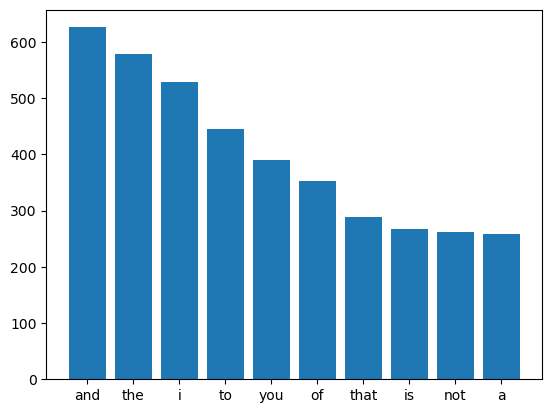

In [273]:
book_1_clean = preprocessing(books[0])
plot_freq(clean_words=book_1_clean)

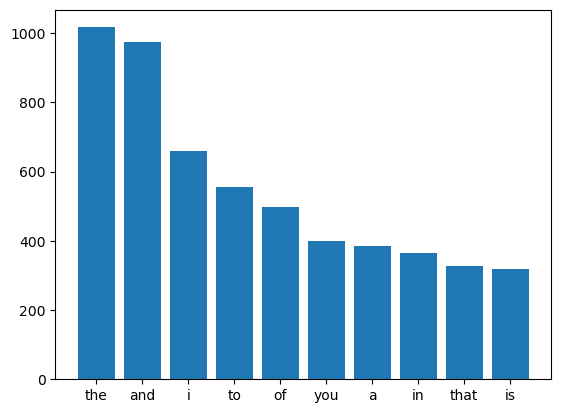

In [274]:
book_2_clean = preprocessing(books[1])
plot_freq(clean_words=book_2_clean)

In [275]:
pos_tag(book_1_clean, tagset="universal")

[('the', 'DET'),
 ('tragedie', 'NOUN'),
 ('of', 'ADP'),
 ('julius', 'NOUN'),
 ('caesar', 'NOUN'),
 ('by', 'ADP'),
 ('william', 'NOUN'),
 ('shakespeare', 'NOUN'),
 ('1599', 'NUM'),
 ('actus', 'NOUN'),
 ('primus', 'NOUN'),
 ('scoena', 'NOUN'),
 ('prima', 'NOUN'),
 ('enter', 'NOUN'),
 ('flauius', 'NOUN'),
 ('murellus', 'NOUN'),
 ('and', 'CONJ'),
 ('certaine', 'NOUN'),
 ('commoners', 'NOUN'),
 ('ouer', 'VERB'),
 ('the', 'DET'),
 ('stage', 'NOUN'),
 ('flauius', 'ADJ'),
 ('hence', 'NOUN'),
 ('home', 'NOUN'),
 ('you', 'PRON'),
 ('idle', 'VERB'),
 ('creatures', 'NOUN'),
 ('get', 'VERB'),
 ('you', 'PRON'),
 ('home', 'NOUN'),
 ('is', 'VERB'),
 ('this', 'DET'),
 ('a', 'DET'),
 ('holiday', 'NOUN'),
 ('what', 'PRON'),
 ('know', 'VERB'),
 ('you', 'PRON'),
 ('not', 'ADV'),
 ('(', '.'),
 ('being', 'VERB'),
 ('mechanicall', 'NOUN'),
 (')', '.'),
 ('you', 'PRON'),
 ('ought', 'VERB'),
 ('not', 'ADV'),
 ('walke', 'VERB'),
 ('vpon', 'ADP'),
 ('a', 'DET'),
 ('labouring', 'ADJ'),
 ('day', 'NOUN'),
 ('without

In [276]:
from nltk.tag import pos_tag

for k,v in dict(pos_tag(book_1_clean)).items():
    if v == 'NN':
        print("Names are : ", k)

Names are :  tragedie
Names are :  julius
Names are :  caesar
Names are :  william
Names are :  shakespeare
Names are :  actus
Names are :  primus
Names are :  scoena
Names are :  prima
Names are :  enter
Names are :  flauius
Names are :  certaine
Names are :  stage
Names are :  hence
Names are :  get
Names are :  holiday
Names are :  mechanicall
Names are :  day
Names are :  signe
Names are :  profession
Names are :  trade
Names are :  thou
Names are :  car
Names are :  sir
Names are :  carpenter
Names are :  apron
Names are :  rule
Names are :  apparrell
Names are :  cobl
Names are :  respect
Names are :  workman
Names are :  i
Names are :  cobler
Names are :  conscience
Names are :  mender
Names are :  fla.
Names are :  knaue
Names are :  nay
Names are :  mend
Names are :  mean'st
Names are :  cobble
Names are :  aule
Names are :  surgeon
Names are :  danger
Names are :  trod
Names are :  haue
Names are :  shop
Names are :  do'st
Names are :  leade
Names are :  indeede
Names are :  

Names are :  water
Names are :  post
Names are :  safety
Names are :  shalt
Names are :  oration
Names are :  issue
Names are :  discourse
Names are :  yong
Names are :  ple
Names are :  audience
Names are :  streete
Names are :  censure
Names are :  wisedom
Names are :  assembly
Names are :  demand
Names are :  fortune
Names are :  bondman
Names are :  countrey
Names are :  pause
Names are :  reply
Names are :  glory
Names are :  mourn
Names are :  co
Names are :  monwealth
Names are :  showts
Names are :  chaire
Names are :  bury
Names are :  euill
Names are :  faithfull
Names are :  fill
Names are :  cry'de
Names are :  sterner
Names are :  stuffe
Names are :  kingly
Names are :  refuse
Names are :  coffin
Names are :  y
Names are :  nobler
Names are :  parchment
Names are :  closset
Names are :  testament
Names are :  haire
Names are :  memory
Names are :  mention
Names are :  legacie
Names are :  stabb
Names are :  ring
Names are :  hearse
Names are :  mantle
Names are :  tent
Nam

In [277]:
# from nltk import ne_chunk, pos_tag, word_tokenize
# from nltk.tree import Tree

# nltk_results = ne_chunk(pos_tag(book_1_clean))
# for nltk_result in nltk_results:
#     if type(nltk_result) == Tree:
#         name = ''
#         for nltk_result_leaf in nltk_result.leaves():
#             name += nltk_result_leaf[0] + ' '
#         print ('Type: ', nltk_result.label(), 'Name: ', name)

### On actual dataset

#### Problem statement - 
basic data exploration and understanding a restaurant customer ratings and reviews from kaggle in the year 2019.


In [278]:
import pandas as pd

In [279]:
review_corpus = pd.read_csv('Restaurant_Reviews.csv')["Review"].to_list()
review_corpus

['Wow... Loved this place.',
 'Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'Now I am getting angry and I want my damn pho.',
 "Honeslty it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'The fries were great too.',
 'A great touch.',
 'Service was very prompt.',
 'Would not go back.',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
 'I was disgusted because I was pretty sure that was human hair.',
 'I was shocked because no signs indicate cash only.',
 'Highly recommended.',
 'Waitress was a little slow in service.',
 'This place is not worth your time, let alone Vegas.',
 'did not like at all.

In [280]:
def preprocessing(text,remove_stopwords):
    lower_text = text.lower()
    tokinized_words = nltk.word_tokenize(lower_text)
    punctuation = [',', '.', "\'", '-', "'s", '"', "``", "''","[","]","?",":"]
    clean_words = [i for i in tokinized_words if i not in punctuation]
    stop_words = stopwords.words('english')
    if remove_stopwords:
#         print("this is true")
        relavent_words = [word for word in clean_words if word not in stop_words]
        return relavent_words
    else:
        return clean_words

In [281]:
def frequency_count(preped_text,word_freq={}):
    for i  in preped_text:
        if i in word_freq.keys():
            word_freq[i] += 1
        else:
            word_freq[i] = 1
    word_freq = dict(sorted(word_freq.items(), key=lambda item: (item[1],item[0]),reverse=True))
    return word_freq


def most_freq_words(clean_words):
    freq_count = frequency_count(clean_words)
    most_common_words = dict(list(freq_count.items())[:10])
    return most_common_words

In [282]:
import matplotlib.pyplot as plt
def plot_freq(text, remove_stopwords=False):
    clean_words = preprocessing(text, remove_stopwords)
    most_common_words = most_freq_words(clean_words)
    plt.bar(list(most_common_words.keys()), height=list(most_common_words.values()))
    plt.show();

In [283]:
words = preprocessing(review_corpus[1],remove_stopwords=True)
words

['crust', 'good']

In [284]:
freq_counter(words)

{'good': 1, 'crust': 1}

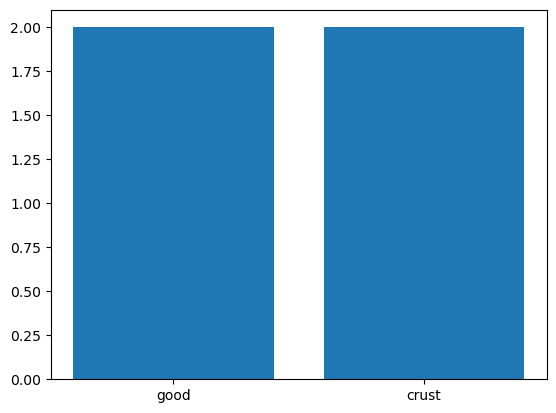

In [285]:
plot_freq(review_corpus[1], remove_stopwords=True)

In [286]:
from nltk.collocations import ngrams

In [300]:
bigram = []
for i in review_corpus:
    bi_grams = ngrams(preprocessing(i, remove_stopwords=True), 2)
    for grams in bi_grams:
        bigram.append(grams)
bigram

[('wow', '...'),
 ('...', 'loved'),
 ('loved', 'place'),
 ('crust', 'good'),
 ('tasty', 'texture'),
 ('texture', 'nasty'),
 ('stopped', 'late'),
 ('late', 'may'),
 ('may', 'bank'),
 ('bank', 'holiday'),
 ('holiday', 'rick'),
 ('rick', 'steve'),
 ('steve', 'recommendation'),
 ('recommendation', 'loved'),
 ('selection', 'menu'),
 ('menu', 'great'),
 ('great', 'prices'),
 ('getting', 'angry'),
 ('angry', 'want'),
 ('want', 'damn'),
 ('damn', 'pho'),
 ('honeslty', "n't"),
 ("n't", 'taste'),
 ('taste', 'fresh'),
 ('fresh', ')'),
 ('potatoes', 'like'),
 ('like', 'rubber'),
 ('rubber', 'could'),
 ('could', 'tell'),
 ('tell', 'made'),
 ('made', 'ahead'),
 ('ahead', 'time'),
 ('time', 'kept'),
 ('kept', 'warmer'),
 ('fries', 'great'),
 ('great', 'touch'),
 ('service', 'prompt'),
 ('would', 'go'),
 ('go', 'back'),
 ('cashier', 'care'),
 ('care', 'ever'),
 ('ever', 'say'),
 ('say', 'still'),
 ('still', 'ended'),
 ('ended', 'wayyy'),
 ('wayyy', 'overpriced'),
 ('tried', 'cape'),
 ('cape', 'cod'),


In [298]:
trigram = []
for i in review_corpus:
    tri_grams = ngrams(preprocessing(i, remove_stopwords=True), 3)
    for grams in tri_grams:
        trigram.append(grams)
trigram

[('wow', '...', 'loved'),
 ('...', 'loved', 'place'),
 ('tasty', 'texture', 'nasty'),
 ('stopped', 'late', 'may'),
 ('late', 'may', 'bank'),
 ('may', 'bank', 'holiday'),
 ('bank', 'holiday', 'rick'),
 ('holiday', 'rick', 'steve'),
 ('rick', 'steve', 'recommendation'),
 ('steve', 'recommendation', 'loved'),
 ('selection', 'menu', 'great'),
 ('menu', 'great', 'prices'),
 ('getting', 'angry', 'want'),
 ('angry', 'want', 'damn'),
 ('want', 'damn', 'pho'),
 ('honeslty', "n't", 'taste'),
 ("n't", 'taste', 'fresh'),
 ('taste', 'fresh', ')'),
 ('potatoes', 'like', 'rubber'),
 ('like', 'rubber', 'could'),
 ('rubber', 'could', 'tell'),
 ('could', 'tell', 'made'),
 ('tell', 'made', 'ahead'),
 ('made', 'ahead', 'time'),
 ('ahead', 'time', 'kept'),
 ('time', 'kept', 'warmer'),
 ('would', 'go', 'back'),
 ('cashier', 'care', 'ever'),
 ('care', 'ever', 'say'),
 ('ever', 'say', 'still'),
 ('say', 'still', 'ended'),
 ('still', 'ended', 'wayyy'),
 ('ended', 'wayyy', 'overpriced'),
 ('tried', 'cape', 'cod

In [289]:
def books_data(corp):
    full_data = {}
    for book in corp:
        words = preprocessing(book, remove_stopwords=False)
        num_raw = len(book)
        num_sentences = len(sent_tokenize(book))
        num_words = len(clean_words)
        vocab = list(set(clean_words))
        num_vocab = len(vocab)
        ttr = (num_vocab/num_words)*100
        full_data[book] = {
            "characters": num_raw,
            "sentences": num_sentences,
            "words": num_words,
            "vocab": num_vocab,
            "ttr": ttr,
        }
    return pd.DataFrame(full_data)

In [290]:
books_data(review_corpus)

,Wow... Loved this place.,Crust is not good.,Not tasty and the texture was just nasty.,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,The selection on the menu was great and so were the prices.,Now I am getting angry and I want my damn pho.,Honeslty it didn't taste THAT fresh.),The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,The fries were great too.,A great touch.,...,The refried beans that came with my meal were dried out and crusty and the food was bland.,Spend your money and time some place else.,A lady at the table next to us found a live green caterpillar In her salad.,the presentation of the food was awful.,I can't tell you how disappointed I was.,I think food should have flavor and texture and both were lacking.,Appetite instantly gone.,Overall I was not impressed and would not go back.,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.","Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."
characters,24.000000,18.000000,41.000000,87.000000,59.000000,46.000000,37.000000,111.000000,25.000000,14.000000,...,90.000000,42.000000,75.000000,39.000000,40.000000,66.000000,24.000000,50.000000,91.000000,134.000000
sentences,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
words,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,...,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000
vocab,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,...,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
ttr,21.588335,21.588335,21.588335,21.588335,21.588335,21.588335,21.588335,21.588335,21.588335,21.588335,...,21.588335,21.588335,21.588335,21.588335,21.588335,21.588335,21.588335,21.588335,21.588335,21.588335
